# **Data Analytics**
------

## Sentiment Analysis Lab


Take the **TRUMP** tweets and create your analytics:


*   When Trump wishes the Olympic team good luck, he’s tweeting
from his iPhone.
*   When he’s insulting a rival, he’s usually tweeting from an Android.

Make your analytics!

*Is this an artifact showing which tweets are Trump’s own and which
are by some handler? Any other insights?*

### Hint

Control for instance:
* Number of tweets from Android/iPhone
* Most frequent positive and words
* Sentiment dynamics

In [26]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from afinn import Afinn
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

import re

from nltk.tokenize import TweetTokenizer
tokening = TweetTokenizer()

from collections import Counter
import itertools

from nltk.corpus import stopwords

import string
from nltk import wordpunct_tokenize

from nltk.stem.lancaster import LancasterStemmer
lancaster_stemmer = LancasterStemmer()

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words=None, lowercase=True, max_features=5000)

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

[nltk_data] Downloading package punkt to /Users/Giorgia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Giorgia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
url = 'https://raw.githubusercontent.com/nprapps/trump-tweet-analysis/master/data/since-20170120.json'
trump_df = pd.read_json(url)

In [18]:
print(type(trump_df))
print(len(trump_df))

<class 'pandas.core.frame.DataFrame'>
4575


In [19]:
trump_df.head(6)

,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text
0,2018-09-01 02:40:23,21996,1035718986871320576,False,5540,Twitter for iPhone,Still can’t believe that Bloomberg violated a ...
1,2018-09-01 02:36:57,18946,1035718119459893248,False,3885,Twitter for iPhone,Great day in North Carolina where Republicans ...
2,2018-09-01 02:35:28,20129,1035717747936768000,False,5164,Twitter for iPhone,The ABC/Washington Post Poll was by far the le...
3,2018-09-01 02:25:38,21855,1035715271418413056,False,5717,Twitter for iPhone,.@Rasmussen_Poll just came out at 48% approval...
4,2018-09-01 00:01:21,31907,1035678961349668864,False,8506,Twitter for iPhone,https://t.co/c79zLeREOA
5,2018-08-31 22:07:25,34220,1035650292782653440,False,9169,Twitter for iPhone,“President Donald J. Trump is Strengthening Re...


In [20]:
tweets = trump_df['text']
tweets.head()

0    Still can’t believe that Bloomberg violated a ...
1    Great day in North Carolina where Republicans ...
2    The ABC/Washington Post Poll was by far the le...
3    .@Rasmussen_Poll just came out at 48% approval...
4                              https://t.co/c79zLeREOA
Name: text, dtype: object

## Number of tweets from Android/iPhone

In [21]:
tweets_iphone = trump_df[trump_df.source == 'Twitter for iPhone'].apply(pd.to_numeric, errors='coerce')
print('Number of tweets from iPhone: ', len(tweets_iphone))

tweets_android = trump_df[trump_df.source == 'Twitter for Android'].apply(pd.to_numeric, errors='coerce')
print('Number of tweets from Android: ', len(tweets_android))

Number of tweets from iPhone:  4134
Number of tweets from Android:  174


## Most frequent positive and words

In [27]:
emoticons_str = r"""
(?:
    [:=;] # Eyes
    [oO\-]? # Nose (optional)
    [D\)\]\(\]/\\OpP] # Mouth
)"""

regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs

    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
    
def tokenize(s):
    return tokens_re.findall(s)

def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens
    
def preprocess_official(dataset):
    tweets_tokenized = dataset.apply(preprocess)

    #tweets_tokenized = new_tweets.apply(tokening.tokenize)
    
    # Stopwords removal
    stop = stopwords.words('english')
    # adding some of the stopwords after observing the tweets
    stop = set(stop)
    stop.add("”")
    stop.add("“")
    stop.add("’")
    stop.add("…")
    stop.add("...")
    stop.add("u")
    stop.add("🇸")
    stop.add("🇺")
    stop.add("https")
    stop.add("co")
    stop = list(stop)

    tweets_tokenized_stop = tweets_tokenized.apply(lambda x: [item for item in x if item.lower() not in stop])

    # Punctuation removal
    punctuation = string.punctuation

    tweets_tokenized_stop_punct = tweets_tokenized_stop.apply(lambda x: [item for item in x if item not in punctuation])

    # Stemming
    lancaster_stemmer = LancasterStemmer()

    tweets_tokenized_new_stem = tweets_tokenized_stop_punct.apply(lambda x: [lancaster_stemmer.stem(item) for item in x])

    sentences = (list(itertools.chain(tweets_tokenized_new_stem)))
    flat_list = [item for sublist in sentences for item in sublist]

    c = Counter(flat_list)
    c.most_common(30)
    #RT stay for rusty trump
    
    return flat_list

(-0.5, 399.5, 199.5, -0.5)

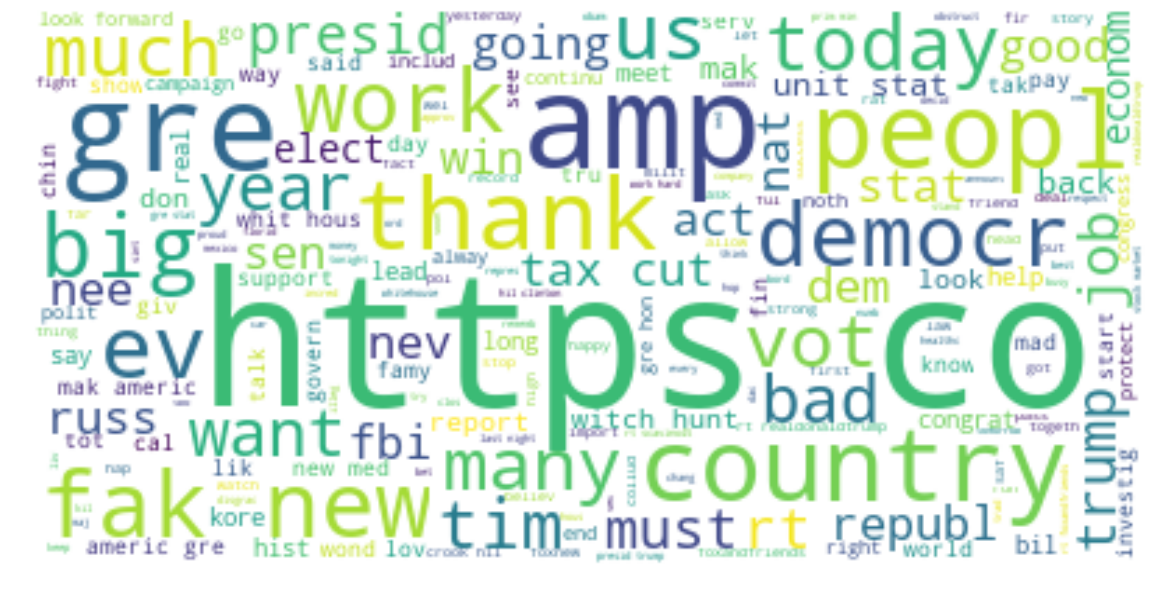

In [28]:
flat_list = preprocess_official(tweets)

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_list))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Sentiment dynamics

In [29]:
afinn = Afinn()

trump_df['afinn'] = trump_df["text"].apply(afinn.score)
trump_df[['afinn', 'text']].head(10)

,afinn,text
0,-3.0,Still can’t believe that Bloomberg violated a ...
1,3.0,Great day in North Carolina where Republicans ...
2,-2.0,The ABC/Washington Post Poll was by far the le...
3,0.0,.@Rasmussen_Poll just came out at 48% approval...
4,0.0,https://t.co/c79zLeREOA
5,2.0,“President Donald J. Trump is Strengthening Re...
6,2.0,"Wow, I made OFF THE RECORD COMMENTS to Bloombe..."
7,-5.0,I will be doing a major rally for Senator Ted ...
8,5.0,"Thank you Indiana, I love you!\nhttps://t.co/T..."
9,0.0,Throwback Thursday! #MAGA https://t.co/8slzITa1l6


In [30]:
trump_df.afinn.value_counts()

 0.0     769
 2.0     463
 3.0     402
 1.0     296
 4.0     263
 5.0     254
-1.0     254
-2.0     240
-3.0     214
 6.0     188
-4.0     154
 7.0     142
-5.0     130
 8.0     103
 9.0     102
-6.0      97
-7.0      85
 12.0     48
-8.0      47
 11.0     47
 10.0     44
-9.0      42
-10.0     29
-12.0     28
 13.0     27
-11.0     23
 14.0     17
 15.0     11
-13.0     10
 16.0      8
 21.0      7
-14.0      6
 17.0      5
-15.0      4
 18.0      4
-17.0      3
 19.0      3
-18.0      2
-20.0      1
-16.0      1
 22.0      1
 27.0      1
Name: afinn, dtype: int64

In [31]:
afinn_positive = trump_df[trump_df.afinn >= 0]
afinn_negative = trump_df[trump_df.afinn < 0]

tweets_positive = afinn_positive['text']
tweets_negative = afinn_negative['text']

flat_pos = preprocess_official(tweets_positive)
flat_neg = preprocess_official(tweets_negative)

(-0.5, 399.5, 199.5, -0.5)

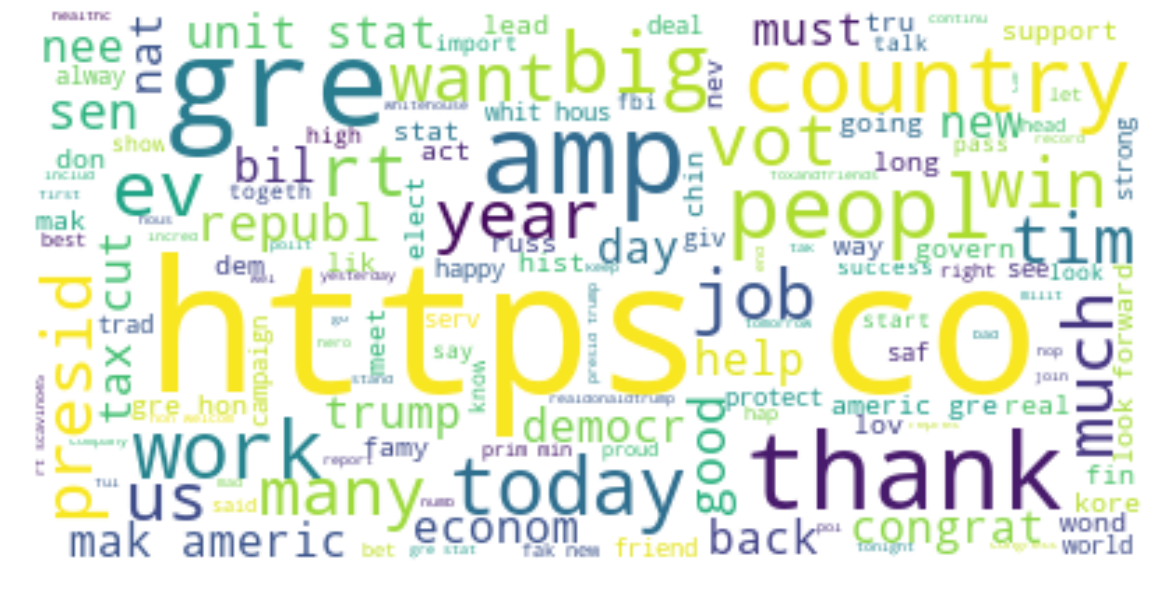

In [32]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_pos))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

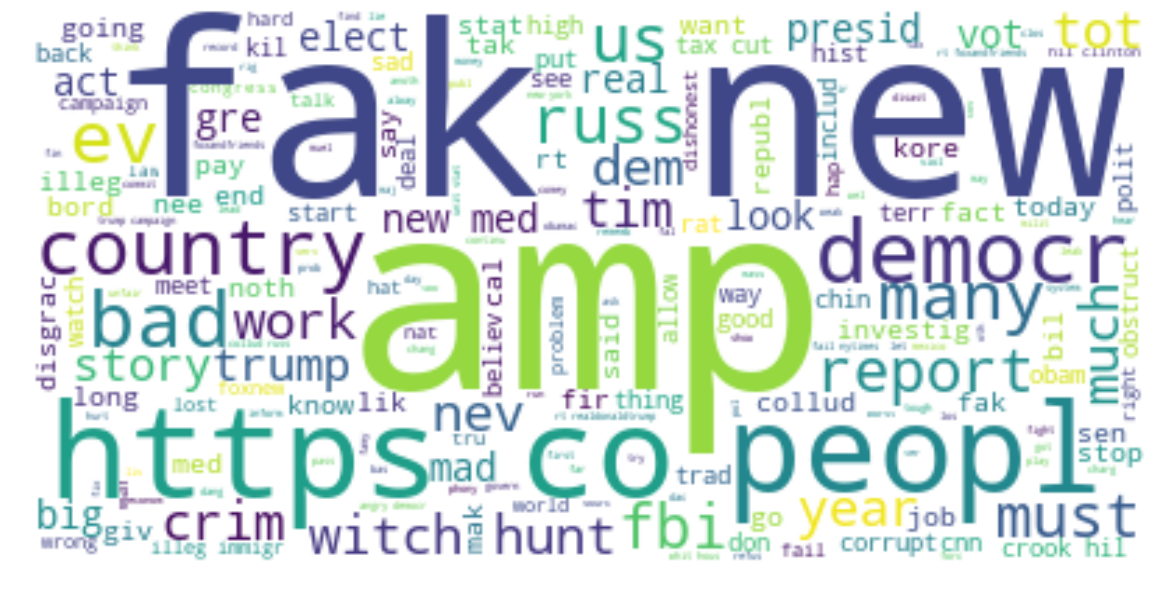

In [33]:
fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(background_color="white").generate(" ".join(flat_neg))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")